In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

from tensorflow import keras
tfds.disable_progress_bar()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


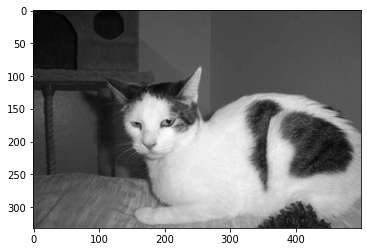

In [3]:
DATDIRTRAIN = '/content/drive/MyDrive/Deep Learning Johan/train'
DATDIRTEST = '/content/drive/MyDrive/Deep Learning Johan/test'
CATEGORIES = ['cat','dog','panda']
for category in CATEGORIES :
  path = os.path.join(DATDIRTRAIN, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap='gray')
    plt.show()
    break
  break

In [4]:
print(img_array.shape)

(332, 500)


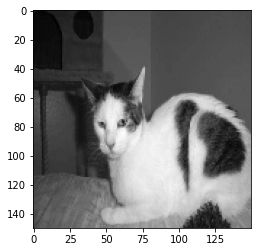

In [5]:
IMG_SIZE = 150
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

0 = cat

1 = dog

2 = panda

In [6]:
training_data = []

def create_training_data():
  for category in CATEGORIES :
    path = os.path.join(DATDIRTRAIN, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
  
create_training_data()

In [7]:
print(len(training_data))

2400


In [8]:
test_data = []

def create_test_data():
  for category in CATEGORIES :
    path = os.path.join(DATDIRTEST, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        test_data.append([new_array,class_num])
      except Exception as e:
        pass
  
create_test_data()

In [9]:
print(len(test_data))

600


In [10]:
import random

In [11]:
random.shuffle(training_data)
# random.shuffle(test_data)

In [12]:
for i in training_data[:10]:
    print(i[1])

2
0
2
2
1
0
2
0
2
2


In [13]:
X_train=[]
y_train=[]

In [14]:
for features, label in training_data:
    X_train.append(features)
    y_train.append(label)
X_train = np.array(X_train).reshape(-1, IMG_SIZE,IMG_SIZE,1)
y_train = np.array(y_train)

In [15]:
X_test=[]
y_test=[]

In [16]:
for features, label in test_data:
    X_test.append(features)
    y_test.append(label)
X_test = np.array(X_test).reshape(-1, IMG_SIZE,IMG_SIZE,1)
y_test = np.array(y_test)

In [17]:
import pickle

In [18]:
pickle_out = open('X_train','wb')
pickle.dump(X_train,pickle_out)
pickle_out.close()

pickle_out = open('y_train','wb')
pickle.dump(y_train,pickle_out)
pickle_out.close()

In [19]:
pickle_out = open('X_test','wb')
pickle.dump(X_test,pickle_out)
pickle_out.close()

pickle_out = open('y_test','wb')
pickle.dump(y_test,pickle_out)
pickle_out.close()

In [20]:
print(type(X_train[0]))

<class 'numpy.ndarray'>


In [21]:
print(type(y_train[0]))

<class 'numpy.int64'>


In [22]:
X_train = X_train/255.0
X_test = X_test/255.0

In [23]:
model = keras.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
75/75 [==============================] - 4s 5ms/step - loss: 7.5994 - accuracy: 0.3988
Epoch 2/5
75/75 [==============================] - 0s 5ms/step - loss: 1.1573 - accuracy: 0.4943
Epoch 3/5
75/75 [==============================] - 0s 5ms/step - loss: 0.9509 - accuracy: 0.5496
Epoch 4/5
75/75 [==============================] - 0s 5ms/step - loss: 0.9112 - accuracy: 0.5531
Epoch 5/5
75/75 [==============================] - 0s 5ms/step - loss: 0.9376 - accuracy: 0.5498


In [24]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.9067 - accuracy: 0.5283


[0.9067392945289612, 0.528333306312561]

In [25]:
model = keras.Sequential([
   keras.layers.Conv2D(64, 3, activation='relu', input_shape=(150,150,1)),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.Flatten(),
   keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
75/75 [==============================] - 33s 39ms/step - loss: 2.5276 - accuracy: 0.4449
Epoch 2/5
75/75 [==============================] - 3s 39ms/step - loss: 0.8418 - accuracy: 0.6175
Epoch 3/5
75/75 [==============================] - 3s 39ms/step - loss: 0.4597 - accuracy: 0.8277
Epoch 4/5
75/75 [==============================] - 3s 40ms/step - loss: 0.2068 - accuracy: 0.9351
Epoch 5/5
75/75 [==============================] - 3s 40ms/step - loss: 0.0979 - accuracy: 0.9835


In [26]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 1s 33ms/step - loss: 1.3561 - accuracy: 0.5967


[1.3561029434204102, 0.596666693687439]

In [27]:
model = keras.Sequential([
   keras.layers.AveragePooling2D(6,3, input_shape=(150,150,1)),
   keras.layers.Conv2D(64, 3, activation='relu'),
   keras.layers.Conv2D(32, 3, activation='relu'),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Dropout(0.5),
   keras.layers.Flatten(),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
75/75 [==============================] - 1s 7ms/step - loss: 0.9730 - accuracy: 0.4686
Epoch 2/5
75/75 [==============================] - 1s 7ms/step - loss: 0.7195 - accuracy: 0.6445
Epoch 3/5
75/75 [==============================] - 1s 7ms/step - loss: 0.6768 - accuracy: 0.6869
Epoch 4/5
75/75 [==============================] - 1s 7ms/step - loss: 0.6361 - accuracy: 0.7043
Epoch 5/5
75/75 [==============================] - 1s 7ms/step - loss: 0.5221 - accuracy: 0.7760


In [28]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 7ms/step - loss: 0.7513 - accuracy: 0.6733


[0.751281201839447, 0.6733333468437195]

In [29]:
pip install -U keras-tuner

     |████████████████████████████████| 71kB 5.1MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp37-none-any.whl size=78938 sha256=a24a67313aacd816ac13b27ffc4be7db3d1b7e4b7895595bc62823624e8c30d3
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp37-none-any.whl size=15356 sha256=eec1d1e44c3be54413e79bd03399c95690560a985d522475e6fdb08842a45879
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [30]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
  model = keras.Sequential()

  model.add(keras.layers.AveragePooling2D(6,3,input_shape=(150,150,1)))

  for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
    model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters", [16,32,64]), 3, activation='relu'))
  
  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice("Dense layer", [64, 128, 256, 512, 1024]), activation='relu'))

  model.add(keras.layers.Dense(3, activation='softmax'))

  model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  
  return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=32,
)

tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Trial 32 Complete [00h 00m 04s]
val_accuracy: 0.5649999976158142

Best val_accuracy So Far: 0.7066666483879089
Total elapsed time: 00h 03m 46s
INFO:tensorflow:Oracle triggered exit


In [31]:
best_model = tuner.get_best_models()[0]

In [32]:
best_model.evaluate(X_test, y_test)

19/19 [==============================] - 0s 5ms/step - loss: 0.8881 - accuracy: 0.6479


[0.7775735259056091, 0.7066666483879089]

In [33]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d (AveragePo (None, 49, 49, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 47, 47, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

In [34]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
Conv Layers: 2
Dense layer: 128
layer_0_filters: 32
layer_1_filters: 64
layer_2_filters: 32
Score: 0.7066666483879089
Trial summary
Hyperparameters:
Conv Layers: 1
Dense layer: 128
layer_0_filters: 16
layer_1_filters: 16
layer_2_filters: 64
Score: 0.70333331823349
Trial summary
Hyperparameters:
Conv Layers: 2
Dense layer: 1024
layer_0_filters: 64
layer_1_filters: 16
layer_2_filters: 32
Score: 0.70333331823349
Trial summary
Hyperparameters:
Conv Layers: 2
Dense layer: 256
layer_0_filters: 16
layer_1_filters: 16
Score: 0.6966666579246521
Trial summary
Hyperparameters:
Conv Layers: 2
Dense layer: 128
layer_0_filters: 16
layer_1_filters: 16
layer_2_filters: 32
Score: 0.6949999928474426
Trial summary
Hyperparameters:
Conv Layers: 1
Dense layer: 1024
layer_0_filters: 32
layer_1_filters: 64
layer_2_filters: 64
Score: 0.6949999928474426
Trial summa

In [36]:
best_model.save('./modelcatdogpandas')

INFO:tensorflow:Assets written to: ./modelcatdogpandas/assets


In [38]:
loaded_model = keras.models.load_model('./modelcatdogpandas')

In [40]:
loaded_model.evaluate(X_test,y_test)

19/19 [==============================] - 0s 5ms/step - loss: 0.7776 - accuracy: 0.7067


[0.7775735259056091, 0.7066666483879089]